In [1]:
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from matplotlib import pyplot as plt
import numpy as np

# STEP 1

1. 

Supervised learning is a form of machine learning, where we aim to construct a model using training data, to make predictions about unknown or future data. One goal
of supervised learning is to make accurate predictions about unknown data from known data, and to tell us information about existing data. These goals change the way we approach supervised learning, for example, when we use a decision tree, we are wanting to find out what variables are most important in determining an outcome. An example of this is looking at quantities of different genes in people with a given disease. Conversely, with a linear model, we might be more interested in predicting a future outcome. An example of this is predicting future house prices from an existing dataset of house prices over time. 

2.

Linear regression tells us how much a change in variable X will affect variable Y. From this, we can model any amount of variables, and find which variables correlate with Y. This tells us about the relationships between variables, interactions between variables, and which are the most important. 

3.

Cross validation is when you split a dataset into sets called "folds", where the folds are used to test the model, and the remainder of the data is used to train the model. The process is repeated for K folds, until every value has been used for both testing and training. Because the entire dataset is used for both training and testing, as opposed to using a train test split, we are able to obtain an honest estimate of performance. One drawback of cross validation is that its computationally expensive. 

# STEP 2

In [2]:
#1.

measurements = pd.read_csv("measurements.csv")
site_visits = pd.read_csv("site_visits.csv")
water_quality_sites = pd.read_csv("water_quality_sites.csv")

#print(measurements.info(), "\n")
print(measurements.head(), "\n")
#print(site_visits.info(), "\n")
print(site_visits.head(), "\n")
#print(water_quality_sites.info())
print(water_quality_sites.head(), "\n")


                           checksum             Measurement  Value
0  deda7828c5ca8ae842d1d4c7dbaf8d7c  Absorbance Coefficient   16.0
1  5c47147d9c97ab9712106a520320c92b  Absorbance Coefficient   16.0
2  e6b793a64f5092a9ddc3fb850c92b150  Absorbance Coefficient   13.0
3  efe6310e08bbddf82bf35b713fd7bd94  Absorbance Coefficient   13.0
4  fc98017089311bfe513985c5e01393e7  Absorbance Coefficient   15.0 

              Timestamp SiteID  Day of Week  Scientist Verified By  \
0  1989-02-01T10:30:00Z    AK1            4  AK1_SCI28    dicgr128   
1  1989-03-15T11:45:00Z    AK1            4  AK1_SCI80    dicgr128   
2  1989-04-13T11:10:00Z    AK1            5  AK1_SCI28    dicgr128   
3  1989-05-10T11:10:00Z    AK1            4  AK1_SCI28    dicgr128   
4  1989-06-08T10:20:00Z    AK1            5  AK1_SCI22    dicgr128   

                           checksum  
0  deda7828c5ca8ae842d1d4c7dbaf8d7c  
1  5c47147d9c97ab9712106a520320c92b  
2  e6b793a64f5092a9ddc3fb850c92b150  
3  efe6310e08bbddf82bf3

2. 

The measurements dataframe contains 389,721 values, with no missing values. The columns checksum and measurement are both objects, and value is a float. 

The site_visits dataframe contains 29,187 values, with no missing values. The columns are all objects, except for day of week, which is represented by an int. 

The water_quality_sites dataframe contains 77 values with no missing values. Site ID, region, and name are objects. Longitude, latitude and catchment area are floats. Altitude and catchment heigh are ints. 

3. 
From the measurements dataframe, measurement and value columns will be kept for modelling. 

The columns from the site_visits dataframe that I will keep are timestamp, site_id. Day of week, scientist, and verified by are not relevant for modeling. 

The columns from the water_quality_sites dataframe that I will keep are site_id, longitude, latitude, catchment area, catchment height and altitude.

Measurement,Absorbance Coefficient,Ammonia,Cloud Cover,Dissolved Oxygen Saturation,Dissolved Reactive Phosphate,E Coli,Electrical Conductivity,Nitrate + Nitrite,Ring Temp,Total Nitrogen,Total Phosphate,Turbidity,Water Temp,pH
checksum,,,,,,,,,,,,,,
0009f4e7ab7d5d41c2280b7f5398e952,0.62,3.0,7.0,103.8,0.4,21.3,60.4,37.0,12.649111,70.0,5.0,1.2,6.4,7.53
000a014f09a691b27896d4731f985f47,7.00,4.0,8.0,102.3,6.2,NaN,121.0,11.0,13.625344,167.0,16.0,1.5,7.9,7.76
0013bf1972cd17f3ddc78c06fa1c4717,6.10,2.0,0.0,99.2,2.6,90.7,121.5,17.0,14.915763,75.0,8.0,1.6,10.8,7.66
00149a2788790394de6a7559f79a50bb,19.35,17.0,4.0,93.9,13.8,157.6,205.0,262.0,-14.948244,695.0,45.0,8.9,10.9,7.26
0014ee63a400dbba8382ba16daed69b9,2.85,9.0,0.0,97.4,18.3,NaN,153.0,282.0,-15.349267,364.0,30.0,6.2,12.4,7.45


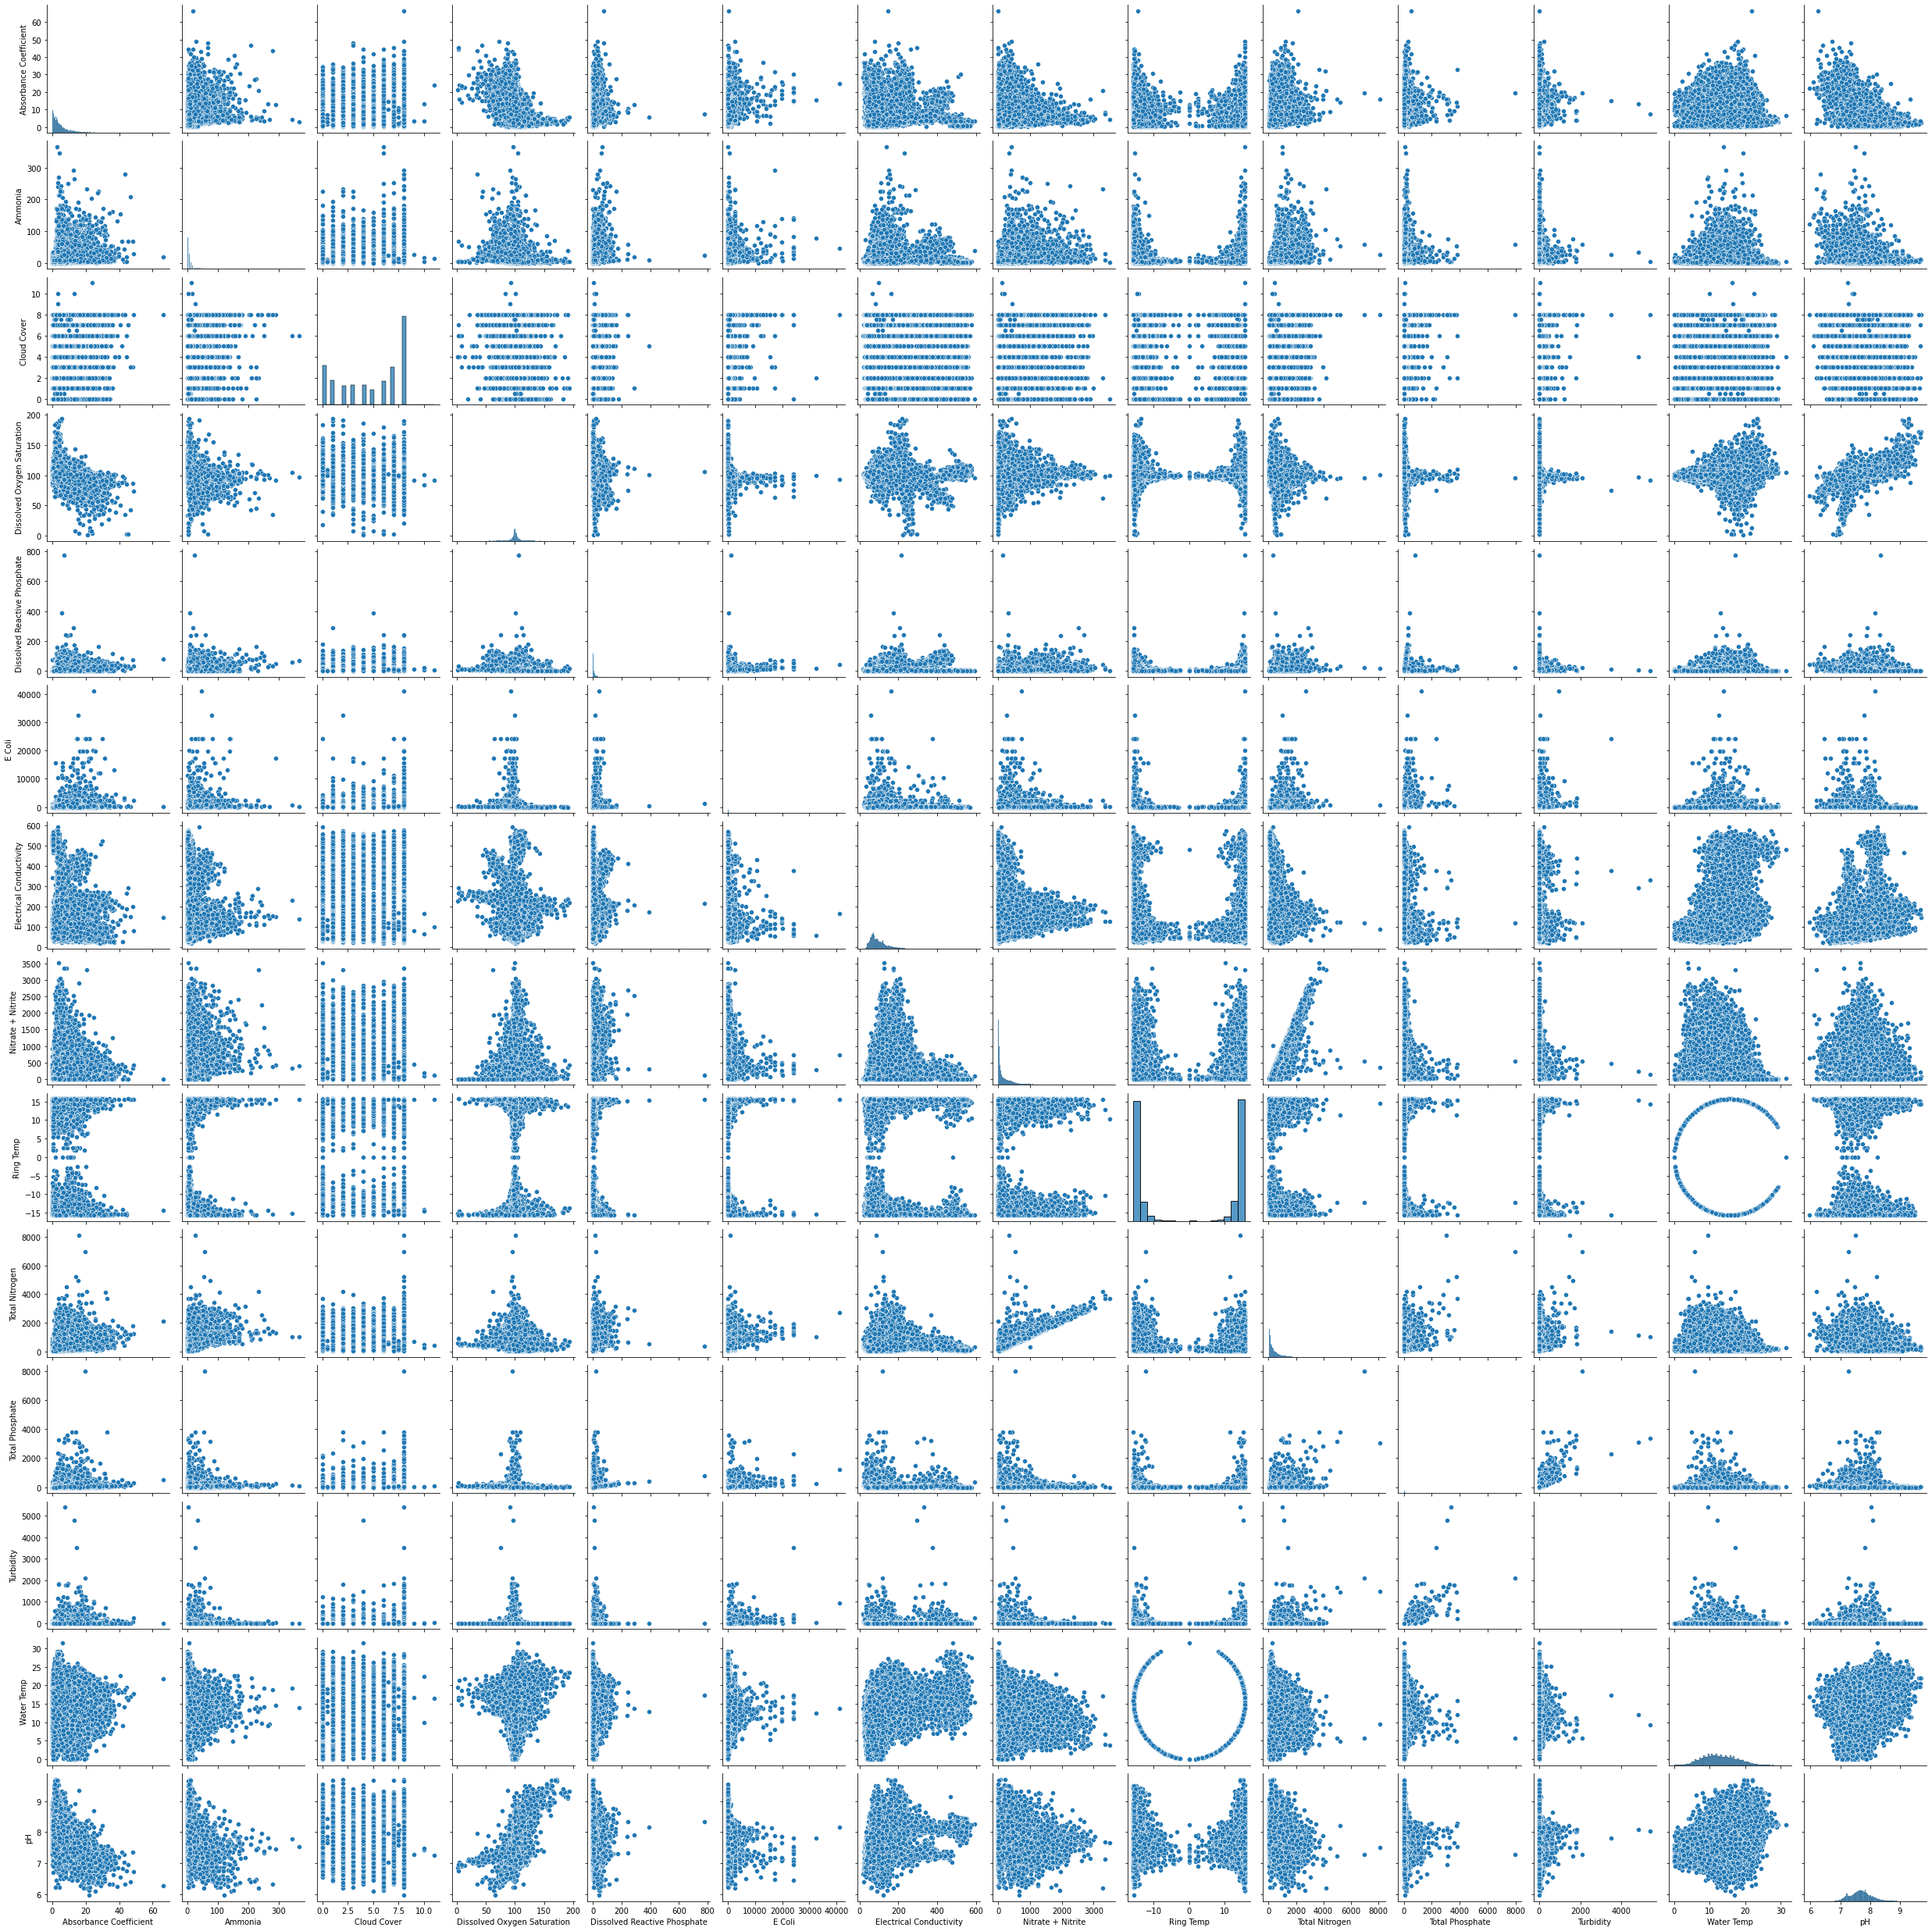

In [3]:
measurements_piv = measurements.pivot(index="checksum", columns="Measurement", values="Value")
sns.pairplot(measurements_piv)
measurements_piv.head()

4. 
The most obvious pattern in the above pairplot is the interaction between ring temperature and water temperature. Because this doesn't look like a nautral result, I will remove ring temp. 

In [4]:
5.

measurement_site_merged = pd.merge(left=measurements_piv, right=site_visits, left_on = "checksum", right_on = "checksum")
measurement_site_merged.drop(columns=['Ring Temp'])
merged = pd.merge(left=measurement_site_merged, right=water_quality_sites)
merged = merged.dropna()

In [5]:
#1.
E_coli_df = merged[merged["E Coli"] >= 550]
E_coli_df = E_coli_df[["SiteID","Region","Name","Longitude","Latitude","E Coli"]]

In [6]:
#2. & 3.
E_coli_grouped = E_coli_df.groupby("SiteID").agg('count')
#4. 
E_coli_grouped["Region"].to_csv("E_coli.csv")

# STEP 3

In [7]:
#1. 

merged = merged.drop(columns=["checksum", "Ring Temp", "Day of Week", "Scientist", "Verified By", "Region","Name","SiteID","Timestamp"])

2. 
I will use pH as my target.

In [8]:
#3. 
folds = KFold(n_splits=10, shuffle=True, random_state=1234)
ml_pipe = Pipeline([ ('scale', 'passthrough'), ('model', LinearRegression()) ])

target = 'pH'
X = merged.drop(columns=[target]).to_numpy()
t = merged[target].to_numpy()

lm_tune_grid = {
    'model' : LinearRegression()
}
ml_pipe.set_params(**lm_tune_grid)

cross_val_score(ml_pipe, X, t, cv=folds, n_jobs=-1).mean()

0.5800400531160312

In [9]:
#4. 

feature_names = merged.drop(columns=target).columns.values

mdl = LinearRegression()
mdl.fit(X, t)

model_details = pd.DataFrame({
    'input_variable' : np.hstack([ 'intercept', feature_names ]),
    'coefficient' : np.hstack([ mdl.intercept_, mdl.coef_ ]).round(4)
})
model_details

,input_variable,coefficient
0,intercept,0.9039
1,Absorbance Coefficient,-0.0102
2,Ammonia,-0.0012
3,Cloud Cover,-0.0006
4,Dissolved Oxygen Saturation,0.0195
5,Dissolved Reactive Phosphate,-0.0015
6,E Coli,0.0000
7,Electrical Conductivity,0.0015
8,Nitrate + Nitrite,-0.0002
9,Total Nitrogen,0.0002


Longitude, Dissolved Oxygen Saturation and Water Temp have the strongest positive association with pH. This means that for a 1 unit increase in each of these variables, we would expect to see a 0.0227, 0.0195 and 0.0152 increase in pH respectively. Latitutde and absorbance coefficient have small negative assocations with pH. This means that for a 1 unit increase in latitude and absorbance coefficient, we would expect to see a 0.009 and 0.0102 unit decrease in pH. 

{'model': KNeighborsRegressor(n_neighbors=8), 'model__n_neighbors': 8, 'scale': StandardScaler()} 0.8050372770338232


<AxesSubplot:xlabel='param_model__n_neighbors', ylabel='mean_test_score'>

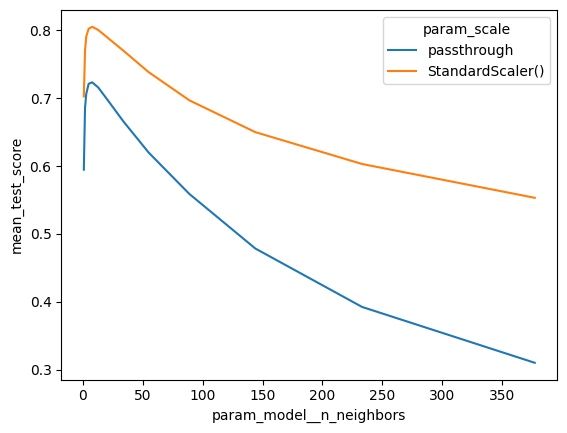

In [10]:
#5.
 
scale = StandardScaler()
knn = KNeighborsRegressor()

ml_pipe = Pipeline([ ('scale', 'passthrough'), ('model', KNeighborsRegressor()) ])

all_k = [1,2,3,5,8,13,21,34,55,89,144,233,377]

knn_tune_grid = {
    'scale' : [ 'passthrough', scale ],
    'model' : [ knn ],
    'model__n_neighbors' : all_k
}

cv = GridSearchCV(ml_pipe, knn_tune_grid, cv=folds, n_jobs=-1)
cv.fit(X, t)
print(cv.best_params_, cv.best_score_)

results = pd.DataFrame(cv.cv_results_)
results.head(5)

sns.lineplot(data=results, x='param_model__n_neighbors', y='mean_test_score', hue='param_scale')

As above, the ideal parameters for the kNN model is a neighbourhood sze of 8, and scaled features. 

{'model': DecisionTreeRegressor(min_samples_split=89), 'model__min_samples_split': 89, 'scale': 'passthrough'} 0.7808955308066997


<AxesSubplot:xlabel='param_model__min_samples_split', ylabel='mean_test_score'>

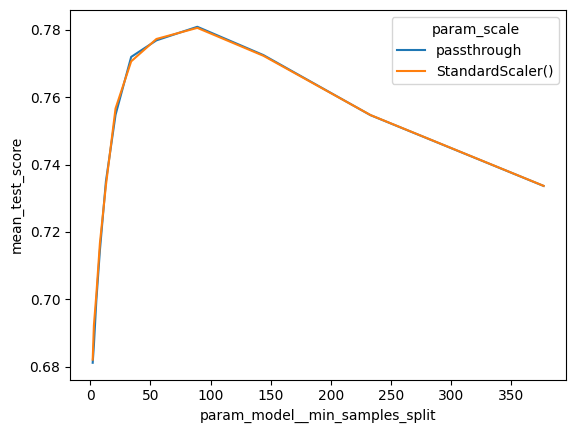

In [11]:
ml_pipe = Pipeline([ ('scale', 'passthrough'), ('model', DecisionTreeRegressor()) ])
folds = KFold(n_splits=10, shuffle=True, random_state=1234)

dtr = DecisionTreeRegressor()

all_split = [2,3,5,8,13,21,34,55,89,144,233,377]

dtr_tune_grid = {
    'scale' : [ 'passthrough', scale ],
    'model' : [ dtr ],
    'model__min_samples_split' : all_split
}

cv = GridSearchCV(ml_pipe, dtr_tune_grid, cv=folds, n_jobs=-1)
cv.fit(X, t)
print(cv.best_params_, cv.best_score_)

results = pd.DataFrame(cv.cv_results_)
results.head(5)

sns.lineplot(data=results, x='param_model__min_samples_split', y='mean_test_score', hue='param_scale')

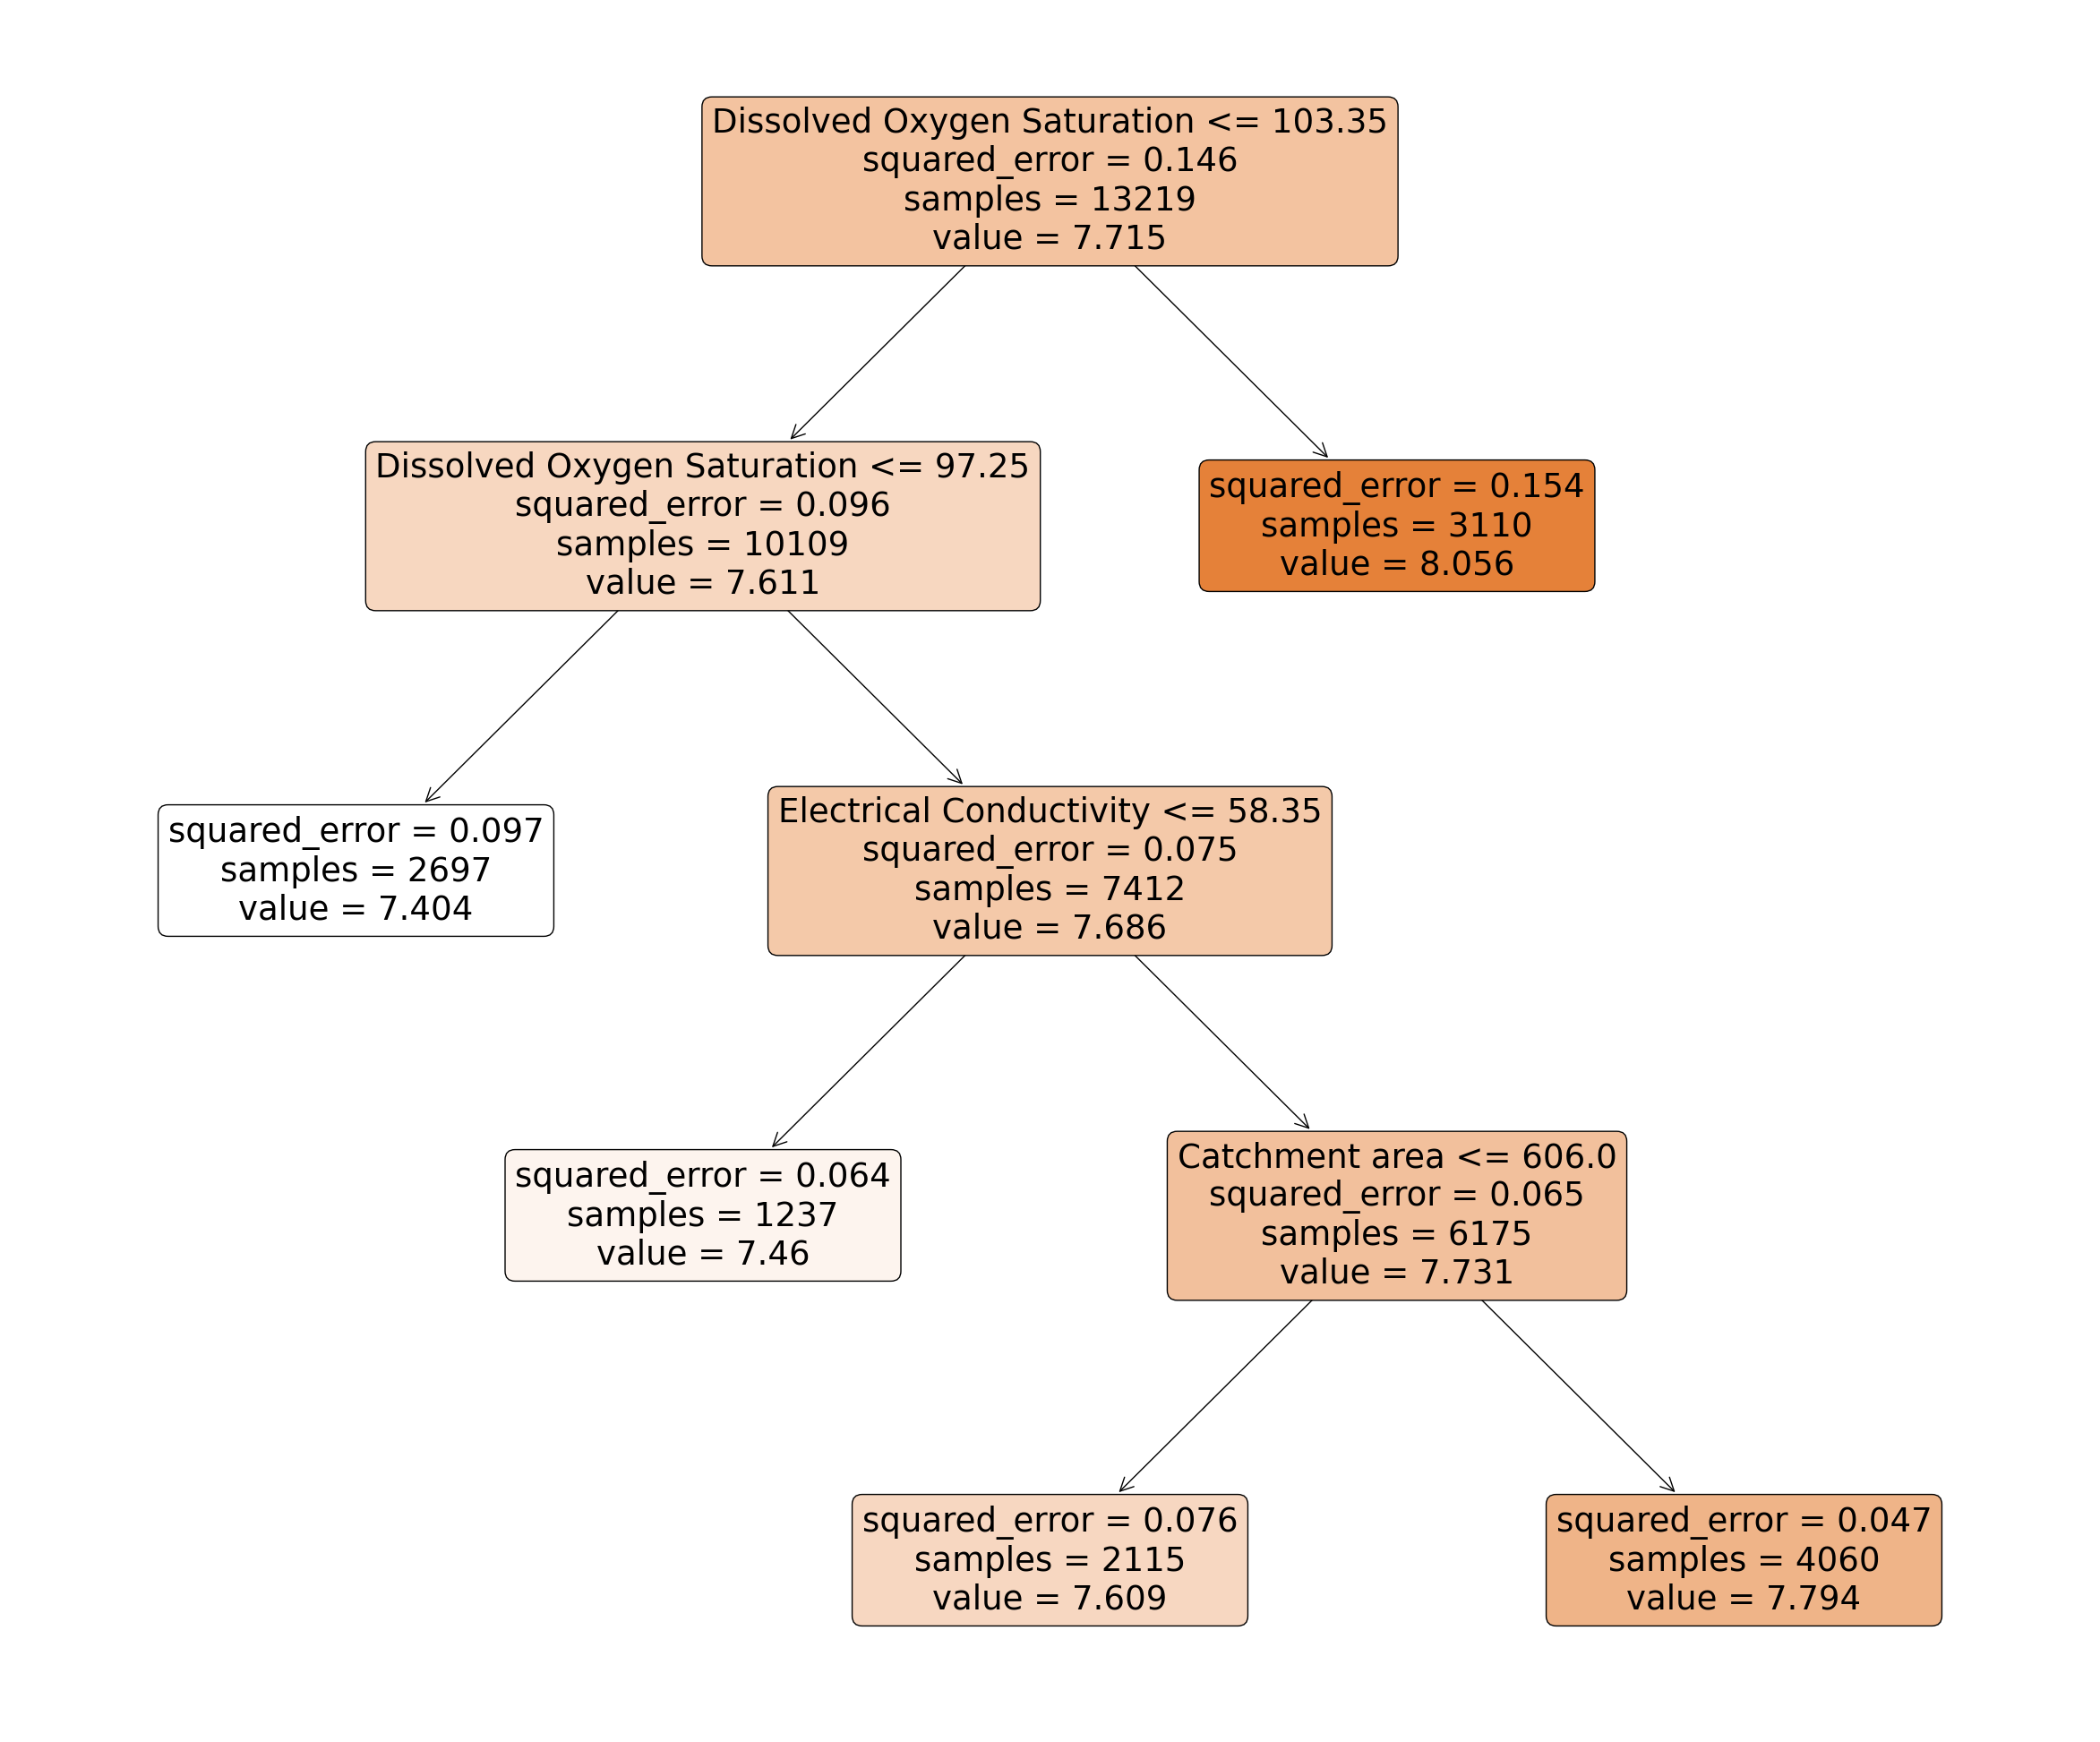

In [12]:
tree = DecisionTreeRegressor(random_state=0, min_samples_split=6000)
tree.fit(X, t)
plt.figure(figsize=(30,25))
plot_tree(tree, rounded=True, filled=True, feature_names=merged.columns.values);

The linear regression appeared to be the poorest model, with an average cross validation score of 0.58. The kNN and decision tree's best scores were 0.8 and 0.78 respectively, significantly outperforming the linear regression. 

{'model': KNeighborsRegressor(n_neighbors=8), 'model__n_neighbors': 8, 'scale': StandardScaler()} 0.8050372770338232


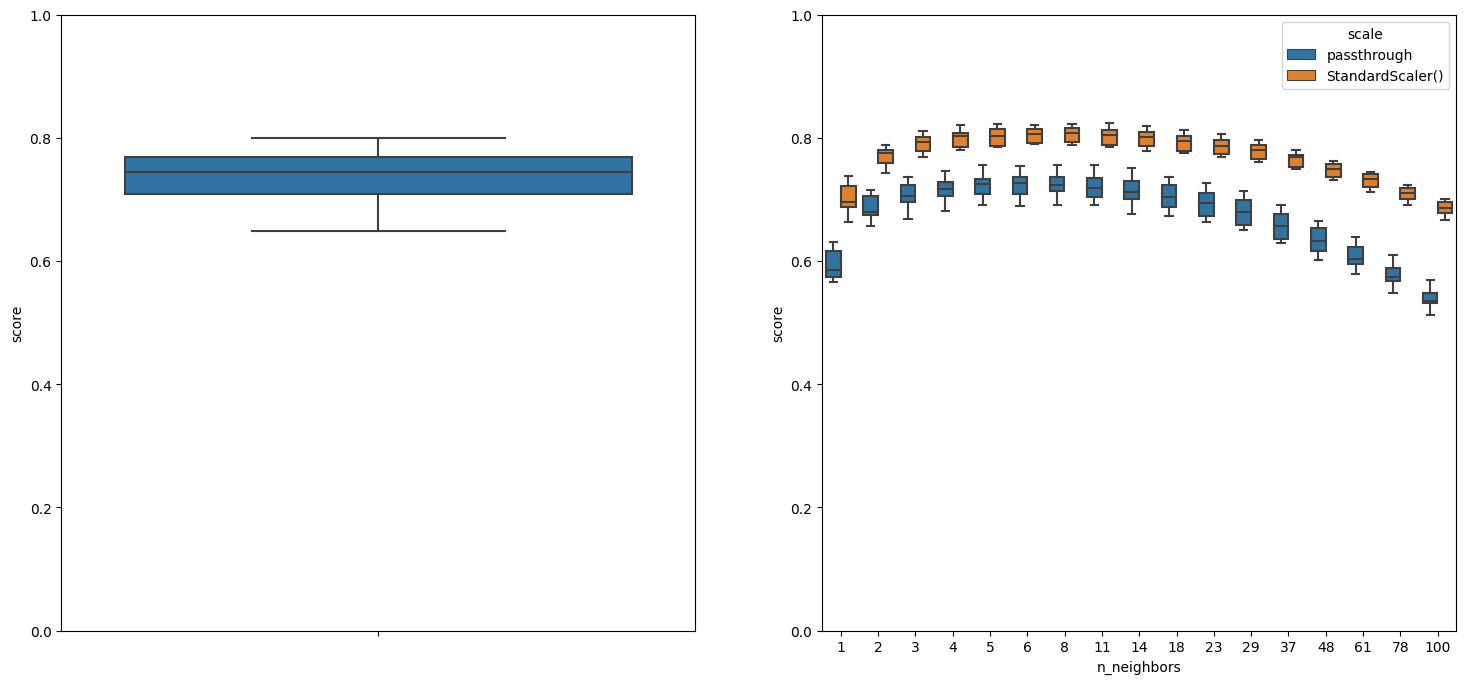

In [13]:
def cleanup_cv_results(cv_results, model_name='model', scale_name='scale'):
    import re
    
    ## remove the "param_"  and "param_model__" prefixes from columns
    r = re.compile(f"param_({model_name}__)*")
    cleaned_names = cv_results.rename(columns=lambda x: r.sub('', x))

    ## identify all the columns that are not the per-split cross validation scores
    r = re.compile(f"split.+_test_score")
    header_cols = [ c for c in cleaned_names.columns.values if not r.match(c) ]
    
    ## return the long version of the data
    return cleaned_names.melt(id_vars=header_cols, var_name='split', value_name='score')


scale = StandardScaler()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()

all_k = np.unique(np.logspace(0, 2, 20, base=10).astype(int))

dtr_tune_grid = {
    'scale' : [ 'passthrough', scale ],
    'model' : [ dtr ],
    'model__min_samples_split' : all_split
}

knn_tune_grid = {
    'scale' : [ 'passthrough', scale ],
    'model' : [ knn ],
    'model__n_neighbors' : all_k
}

cmp_tune_grid = [
    dtr_tune_grid,
    knn_tune_grid
]

cv = GridSearchCV(ml_pipe, cmp_tune_grid, cv=folds, n_jobs=-1)
cv.fit(X, t)
print(cv.best_params_, cv.best_score_)

clean = cleanup_cv_results(pd.DataFrame(cv.cv_results_))

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(data=clean[clean['model']==dtr], y='score', ax=axs[0])
sns.boxplot(data=clean[clean['model']==knn], x='n_neighbors', y='score', hue='scale', ax=axs[1])
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))
plt.show()


Above is a visual representation of the model performance across models. With a neighbourhood size of ~8, the kNN model slightly outperforms the decision tree regressor model with a higher median r squared. 

The point of building predictive models for pH rather than just measuring pH is that we watnt to uncover relationships between variables, to understand more about freshwater ecosystems themselves. By finding variables that are related, ecologists can understand these complex interactions better. For example, we would expect ammonia to increase the pH, but the linear model shows a negative assocation between ammonia and pH. This suggests that there is something else going on in the ecosystem, which can be an opportunity for further research.